In [25]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
from queue import Queue

# My implementation functions
from algorithms import kahn, bfs, dijkstra, dijkstra_bfs

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


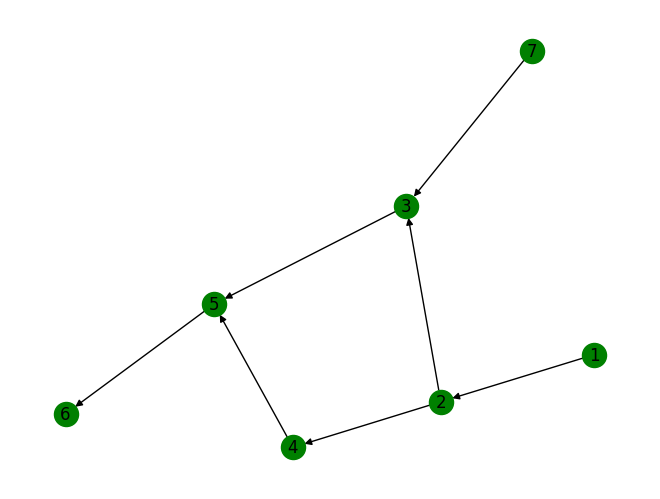

In [26]:
g = nx.DiGraph() 
g.add_edges_from([(1, 2), (2,3), (2,4), (3,5), (4,5), (5,6), (7,3)]) 
nx.draw(g, with_labels=True, node_color ="Green") 

In [27]:
sorted = kahn(g)
print(sorted)


[1, 7, 2, 3, 4, 5, 6]


[2, 3, 4, 6, 0, 5, 1]

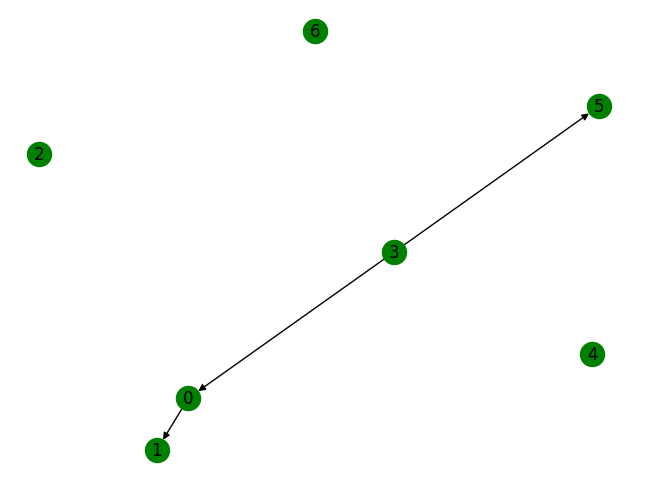

In [28]:
g_random = nx.gnp_random_graph(7,0.05, directed=True)
nx.draw(g_random, with_labels=True, node_color ="Green") 
kahn(g_random)

[1, 2, 3, 4, 5, 7, 6]

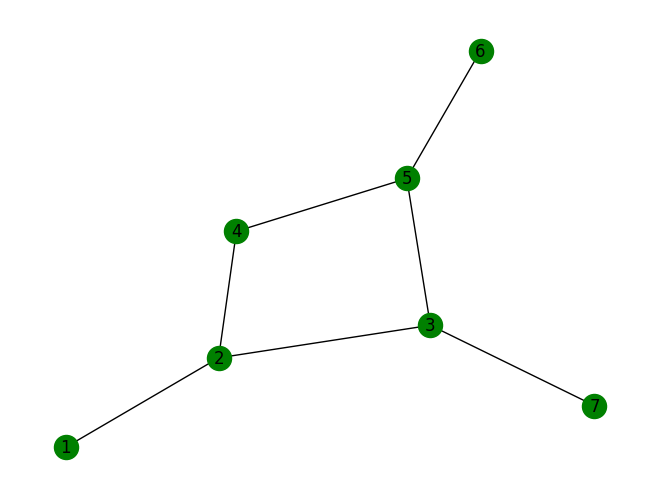

In [29]:
g = nx.Graph() 
g.add_edges_from([(1, 2), (2,3), (2,4), (3,5), (4,5), (5,6), (7,3)]) 
nx.draw(g, with_labels=True, node_color ="Green")  
bfs(g, 1)

{(1, 2): Text(0.6262945088199308, -0.21174014308758182, '10'),
 (2, 3): Text(0.12050057011641124, -0.05242718134985824, '2'),
 (2, 4): Text(0.16129793170851814, -0.30586567551341953, '1'),
 (2, 9): Text(0.4601369468559464, 0.2070190208316518, '2'),
 (3, 5): Text(-0.3260837103370766, -0.10666053379385154, '1'),
 (3, 7): Text(-0.21823021650511165, 0.19482038949338998, '8'),
 (4, 5): Text(-0.2982842771970865, -0.28393870619990697, '5'),
 (5, 6): Text(-0.7917185332008572, -0.2995054883345136, '3'),
 (5, 7): Text(-0.3844643209138662, 0.12504048531262324, '2'),
 (7, 10): Text(-0.07971604338780658, 0.5484603901182875, '1'),
 (9, 10): Text(0.24806344243239176, 0.5883618285913302, '1')}

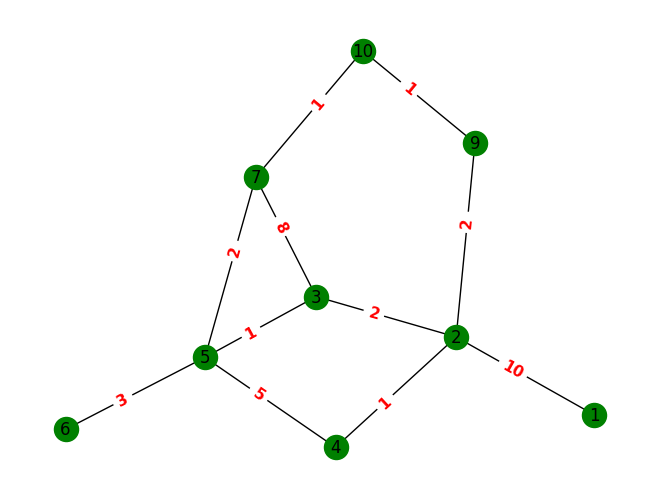

In [30]:
g = nx.Graph() 
edges = [(1, 2, 10),
        (2, 3, 2),
        (2, 4, 1),
        (3, 5, 1),
        (4, 5, 5),
        (5, 6, 3),
        (7, 3, 8),
        (5, 7, 2),
        (2, 9, 2),
        (9, 10, 1),
        (10, 7, 1)] 

for start, end, length in edges:
    g.add_edge(start, end, length=length)
    
pos = nx.spring_layout(g)

nx.draw(g, pos, with_labels=True, node_color ="Green")
edge_labels = dict([((n1, n2), d["length"])
                    for n1, n2, d in g.edges(data=True)])

nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels, label_pos=0.6,
                             font_color='red', font_size=11, font_weight='bold')


In [31]:
print(dijkstra(g, 4, 10))
print(nx.dijkstra_path(g, 4, 10, weight="length"))

Finding shortest path from 4 to 10
[4, 2, 9, 10]
[4, 2, 9, 10]


{('A', 'B'): Text(-0.19302994164425896, -0.7024096223604972, '2'),
 ('A', 'D'): Text(0.01049822688755947, -0.5577278928618111, '8'),
 ('B', 'D'): Text(-0.10091085660452781, -0.35056938305023977, '5'),
 ('B', 'E'): Text(-0.04516224091560328, -0.06978641739710523, '6'),
 ('D', 'E'): Text(0.09278259004710926, 0.026307055704816174, '3'),
 ('D', 'F'): Text(-0.0632581150600034, 0.23556402696770862, '2'),
 ('E', 'C'): Text(0.2300511391446779, 0.6567968130392898, '9'),
 ('E', 'F'): Text(-0.025598946718216442, 0.42768613373919373, '1'),
 ('F', 'C'): Text(0.12373423180081572, 0.8005492052855268, '3')}

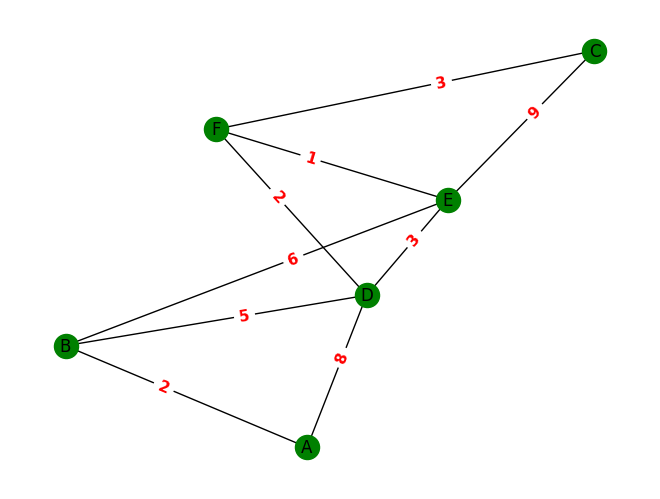

In [32]:
g = nx.Graph() 
edges = [("A", "B", 2),
        ("A", "D", 8),
        ("B", "D", 5),
        ("B", "E", 6),
        ("D", "E", 3),
        ("D", "F", 2),
        ("E", "C", 9),
        ("E", "F", 1),
        ("F", "C", 3)] 

for start, end, length in edges:
    g.add_edge(start, end, length=length)
    
pos = nx.spring_layout(g)

nx.draw(g, pos, with_labels=True, node_color ="Green")
edge_labels = dict([((n1, n2), d["length"])
                    for n1, n2, d in g.edges(data=True)])

nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels, label_pos=0.6,
                             font_color='red', font_size=11, font_weight='bold')

In [33]:
dijkstra(g, "A", "C")

Finding shortest path from A to C


['A', 'B', 'D', 'F', 'C']

In [34]:
nx.dijkstra_path(g, "A", "C", weight="length")

['A', 'B', 'D', 'F', 'C']

{(0, 1): Text(0.5088265440148052, 0.14236841259580224, '8'),
 (0, 2): Text(0.4622202325566749, -0.09308746505044208, '7'),
 (0, 3): Text(0.1347937730578308, -0.056437242197506565, '9'),
 (0, 5): Text(-0.15447541612700832, 0.30585901418056394, '8'),
 (1, 2): Text(0.6573358513870786, -0.1331957214314603, '8'),
 (1, 3): Text(0.3269479293961053, -0.10300389093061968, '5'),
 (2, 3): Text(0.2952977691672458, -0.2660430457856352, '4'),
 (3, 5): Text(-0.22105728415163628, 0.12329885963510412, '5'),
 (3, 6): Text(-0.09344472267259252, -0.6698826644021243, '3'),
 (4, 5): Text(-0.6568839080039695, 0.5612455344698959, '10')}

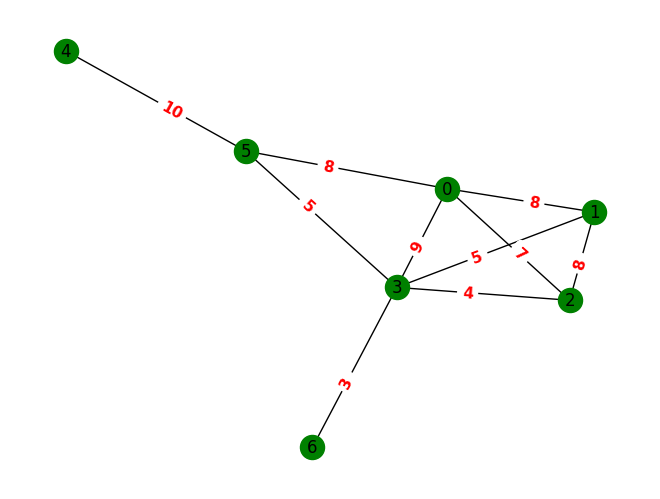

In [35]:
g_random = nx.gnp_random_graph(7,0.55, directed=False)

for (u, v) in g_random.edges():
    g_random.edges[u,v]["length"] = random.randint(0,10)

pos = nx.spring_layout(g_random)

nx.draw(g_random, pos, with_labels=True, node_color ="Green")
edge_labels = dict([((n1, n2), d["length"])
                    for n1, n2, d in g_random.edges(data=True)])

nx.draw_networkx_edge_labels(g_random, pos, edge_labels=edge_labels, label_pos=0.6,
                             font_color='red', font_size=11, font_weight='bold')


In [36]:

for i in range(100000):
    start = random.randint(0, len(g_random.nodes) - 1)
    end = random.randint(0, len(g_random.nodes) - 1)
    
    try:
        my_path = dijkstra(g_random, start, end)
        nx_path = nx.dijkstra_path(g_random, start, end, weight="length")
        
        if my_path != nx_path:
            print(f"Mismatch found on iteration {i + 1}")
            print(f"Start: {start}, End: {end}")
            print("Your dijkstra output: ", my_path)
            print("NetworkX output:      ", nx_path)
            break
    except nx.NetworkXNoPath:
        # No path exists between start and end, skip
        continue
    except Exception as e:
        print(f"Error occurred on iteration {i + 1}: {e}")
        break
else:
    print("All 100000 tests passed: your implementation matches NetworkX.")

Finding shortest path from 1 to 6
Finding shortest path from 1 to 2
Finding shortest path from 0 to 2
Finding shortest path from 2 to 0
Finding shortest path from 0 to 4
Finding shortest path from 4 to 6
Finding shortest path from 6 to 0
Finding shortest path from 1 to 5
Finding shortest path from 5 to 2
Finding shortest path from 2 to 6
Finding shortest path from 3 to 3
Finding shortest path from 4 to 2
Finding shortest path from 1 to 2
Finding shortest path from 2 to 6
Finding shortest path from 3 to 1
Finding shortest path from 2 to 3
Finding shortest path from 5 to 6
Finding shortest path from 6 to 0
Finding shortest path from 4 to 5
Finding shortest path from 1 to 2
Finding shortest path from 0 to 0
Finding shortest path from 0 to 0
Finding shortest path from 2 to 0
Finding shortest path from 5 to 3
Finding shortest path from 1 to 6
Finding shortest path from 1 to 2
Finding shortest path from 3 to 0
Finding shortest path from 0 to 3
Finding shortest path from 6 to 2
Finding shorte

In [37]:
start =  random.randint(0,len(g_random.nodes))
end = random.randint(0,len(g_random.nodes))

print(dijkstra(g_random, start, end))
print(nx.dijkstra_path(g_random, start, end, weight="length"))

Finding shortest path from 5 to 3
[5, 3]
[5, 3]
